In [1]:
import numpy as np

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
y = np.random.randint(10, size=10)
y = y / np.sum(y)

In [4]:
t = np.zeros(10)
t[2] = 1

In [5]:
print(y, t, sep="\n")

[0.08571429 0.17142857 0.02857143 0.         0.17142857 0.11428571
 0.17142857 0.02857143 0.02857143 0.2       ]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
mean_squared_error(y, t)

0.5469387755102041

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
cross_entropy_error(y, t)

3.555344561495539

In [9]:
import sys, os
sys.path.append(os.pardir)
from deep_learning_from_scratch.dataset.mnist import load_mnist

In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [11]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [13]:
# batched cross entropy
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [14]:
a = np.array([i for i in range(10)])
print(a)
a.reshape(1, a.size)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [15]:
a = np.zeros(10)
print(a)
a.reshape(1, a.size)
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
print(x_batch.shape)
print(t_batch.shape)
print(x_batch.reshape(1, x_batch.size).shape)

(10, 784)
(10, 10)
(1, 7840)


In [17]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [18]:
import matplotlib.pyplot as plt

In [19]:
x = np.arange(0, 20, 0.1)
y = function_1(x)

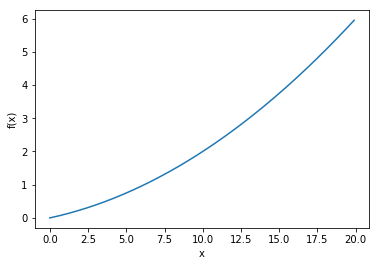

In [20]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [21]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [22]:
numerical_diff(function_1, 5)

0.1999999999990898

In [23]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


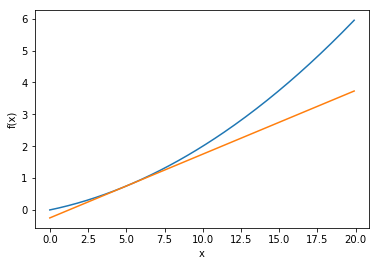

In [24]:
from deep_learning_from_scratch.ch04.gradient_1d import tangent_line

0.1999999999990898


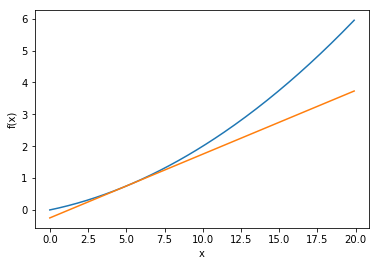

In [25]:
x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [26]:
# Partial derivative
def function_2(x):
    return np.sum(x**2)

In [27]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [28]:
print(numerical_gradient(function_2, np.array([3., 4.])))

[6. 8.]


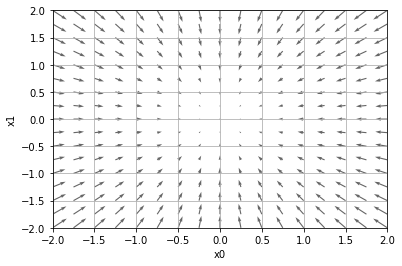

In [29]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]))
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

In [30]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [31]:
import sys, os
sys.path.append(os.pardir)
from deep_learning_from_scratch.common.functions import softmax, cross_entropy_error
from deep_learning_from_scratch.common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [32]:
net = simpleNet()
x = np.array([0.6, 0.9])
p = net.predict(x)
np.argmax(p)

2

In [33]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.6562089431919101

In [34]:
def f(W):
    return net.loss(x, t)

In [35]:
dW = numerical_gradient(f, net.W)

In [36]:
dW

array([[ 0.23396786,  0.05474346, -0.28871132],
       [ 0.3509518 ,  0.08211519, -0.43306699]])

In [37]:
from deep_learning_from_scratch.common.functions import *
from deep_learning_from_scratch.common.gradient import numerical_gradient

In [38]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # initialize weight
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x: input data, t: label data(teacher data?)
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads

In [39]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [40]:
import pickle
"""
with open("net_grads.pkl", "wb") as f:
    pickle.dump(grads, f)
"""
with open("net_grads.pkl", "rb") as f:
    grads = pickle.load(f)

# pickleの中身確認用のコマンド
# !python -m pickle net_grads.pkl

In [41]:
x = np.random.rand(100, 784)
y = np.random.rand(100, 10)
# grads = net.numerical_gradient(x, y)
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [42]:
# 速いやつ

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [46]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# repeat numbers of 1 epoch
iter_per_epoch = max(train_size / batch_size, 1)

# hyper parameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # get batch x and t
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # compute gradient
    grad = network.gradient(x_batch, t_batch)
    
    # update parameters
    for key in network.params.keys():
        network.params[key] -= learning_rate * grad[key]
    
    # track result of loss function
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # compute accuracy each epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"train acc: {train_acc:.3f}, test acc: {test_acc:.3f}")

train acc: 0.099, test acc: 0.103
train acc: 0.796, test acc: 0.799
train acc: 0.880, test acc: 0.885
train acc: 0.899, test acc: 0.901
train acc: 0.907, test acc: 0.910
train acc: 0.914, test acc: 0.916
train acc: 0.918, test acc: 0.920
train acc: 0.924, test acc: 0.927
train acc: 0.928, test acc: 0.932
train acc: 0.931, test acc: 0.933
train acc: 0.934, test acc: 0.936
train acc: 0.937, test acc: 0.939
train acc: 0.940, test acc: 0.940
train acc: 0.941, test acc: 0.943
train acc: 0.944, test acc: 0.943
train acc: 0.946, test acc: 0.945
train acc: 0.947, test acc: 0.946


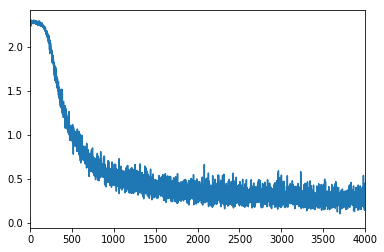

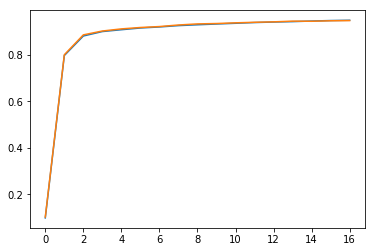

In [50]:
plt.plot(np.arange(0, len(train_loss_list)), train_loss_list)
plt.xlim(0, 4000)
plt.show()
plt.plot(np.arange(0, len(train_acc_list)), train_acc_list)
plt.plot(np.arange(0, len(test_acc_list)), test_acc_list)
plt.show()